<a href="https://colab.research.google.com/github/zaidhassanch/Mask_RCNN/blob/master/assignment_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CS484/684 Computational Vision

# Homework Assignment 0

# Problem 1

##### Define domain transformation functions $t_x(x,y)$ and $t_y(x,y)$ that flip image pixels symmetrically around an arbitrary given line $y=ax+b$. For simplilcity, assume real-valued pixel coordinates in the original and transformed images, i.e. do not worry about any distretization issues.



Prependicular distance of line from point, d = 
$\frac{y-ax+b}{\sqrt{1+a^2}}$

Normalized normal vector from line, $\hat{n} = \frac{1}{\sqrt{1+a^2}}\begin{bmatrix}
           -a \\
           1
         \end{bmatrix} $
         
 $\begin{bmatrix}
           x_{transformed} \\
           y_{transformed}
         \end{bmatrix} = \begin{bmatrix}
           x \\
           y
         \end{bmatrix} - 2\times\hat{n}\times d
         $
         
$t_x(x,y) = x + 2a\left(\frac{y-ax+b}{1+a^2}\right)$

$t_y(x,y) = x + 2\left(\frac{y-ax+b}{1+a^2}\right)$
         

I can provide more steps if required but it is rather cumbersome in latex and I believe that this conveys the point.

# Problem 2

##### (a) Find all points $x$ corresponding to local minima for function $f(x) = x^3 - 2x^2 + x$. Show your derivation.

$f(x) = x^3 - 2x^2 + x$

$f'(x) = 3x^2 - 4x + 1$

$x = \frac{1}{3}\quad and\quad1$ 

$f''(x) = 6x - 4$

$f''(1) = 2, \quad f''(\frac{1}{3}) = -2$

Putting values for x, we find that $f''(x)$ has a **positive** value for $x = 1$, which indicates that it is the minima. 

##### (b) Consider the following function of two variables $f(x,y) = yx^2 + xy^2+x$ and find all points with zero gradient $\nabla f = 0$. HINT: you need to find all solutions to a system of two equations $$\left\{\begin{align} \frac{\partial f}{\partial x} & =  0 \\  \frac{\partial f}{\partial y}  & =  0 \end{align}  \right.$$

$f_{x} = 2xy + y^2 + 1$

$f_{y} = y^2 + 2xy$

Putting $f_y = 0$,

$f_{y} = x(x + 2y)=0$

$x=0 \quad or \quad x = - 2y$

Substuting $x = 0$, into $f_x = 0$:

$y^2 + 1 = 0$

Substuting $x = -2y$, into $f_x = 0$:

$(2y)(-2y) + y^2 + 1 = 0$

$-4y^2 + y^2 + 1 = 0$

$-3y^2 + 1 = 0$

$1 = 3y^2$

$y = \pm\sqrt{\frac{1}{3}}$

$x = \mp2\sqrt{\frac{1}{3}}$



##### (c) Use "matplotlib" to display a 3D plot for function f(x,y) over domain $-2<x<2, -2<y<2 $. Write your code in the cell below. Make sure you "run" the cell with your code below before saving and submitting your notebook. This will make your plot (the output of your code) visible when the notebook is opened for grading.

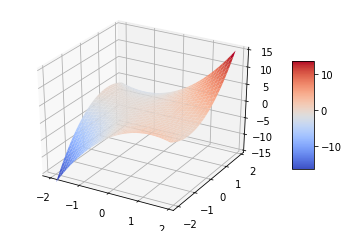

In [0]:
# Solution: write your code in this cell
# Based on: https://matplotlib.org/3.1.1/gallery/mplot3d/surface3d.html
%matplotlib notebook
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# create figure and set projection to 3d in order to use plot_surface
fig = plt.figure()
ax = fig.gca(projection='3d')

# Create a grid of X and Y values for which the F value has to be found
X = np.arange(-2, 2, 0.125)
Y = np.arange(-2, 2, 0.125)
X, Y = np.meshgrid(X, Y)

# Get values of F for all values of X and Y
F = Y * (X**2) + X * (Y**2) + X

# The function for plotting 3d surfaces is plot_surface
surf = ax.plot_surface(X, Y, F, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-15, 15)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


##### (d) Visualize vector field of gradients for $f(x,y)$ over the same domain $-2<x<2, -2<y<2 $. See one of the posted demo notebooks for inspiration.

In [0]:
# Solution: write your code in this cell
# HINT: no need to repeat declaration ""%matplotlib notebook" if this cell is run after previous one.
from matplotlib.pyplot import cm

from scipy import ndimage, signal

# using the derivative technique we studied in class and is recommended in question
derivative_x = (1/2.)*np.array([[ 0.0, 0.0, 0.0],
                                [ 1.0, 0.0, -1.0],
                                [ 0.0, 0.0, 0.0]])

derivative_y = (1/2.)*np.array([[ 0.0, 1.0, 0.0],
                                [ 0.0, 0.0, 0.0],
                                [ 0.0, -1.0, 0.0]])

# convolve to get the gradients
im_dx = signal.convolve2d(F, derivative_x, boundary='symm', mode='same') * 3.
im_dy = signal.convolve2d(F, derivative_y, boundary='symm', mode='same') * 3.
grad = np.sqrt(im_dx**2 + im_dy**2)

<Figure size 1000x600 with 0 Axes>

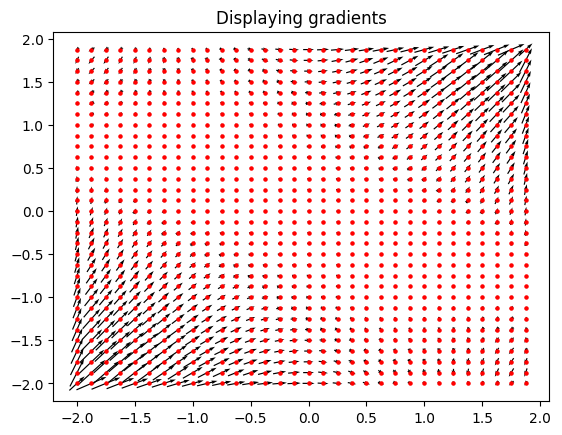

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcdefaults()

plot = plt.figure(2, figsize = (10,6),facecolor = '0.7')

s = 2   # one vector per box of size s*s

fig, ax = plt.subplots()
ax.set_title("Displaying gradients")
Q = ax.quiver(X, Y, im_dx, im_dy, 
               pivot='mid', units='inches')

ax.scatter(X, Y, color='r', s=5)


# plt.colorbar()                  
plt.show(Q) 

# Problem 3

##### Prove that median filtering in not a linear image transormation. HINT: find a counter example showing that for some vectors of the same dimensions $A$ and $B$, $$Med(A + B)\neq Med(A) + Med(B)$$  where operation $Med(X)$ returns median of the elements of vector $X$.

I proceed using the proof by contradiction.

Consider the first vector, $\begin{bmatrix}
           1 \\
           2 \\
           3 
         \end{bmatrix}$, which has a median of 2.
         
Consider the second vector, $\begin{bmatrix}
           6 \\
           4 \\
           9 
         \end{bmatrix}$, which has a median of 6.
         
Their sum is  $\begin{bmatrix}
           7 \\
           6 \\
           12 
         \end{bmatrix}$, which has a median of 7.
   
Clearly, the sum of medians is not equal to the median of the sum of the vectors. And hence, it is obvious that the statement is false, since

$$2 + 6 \neq 7$$

# Problem 4

##### (a) Use the following cell to write python code that loads an arbitrary RGB image and computes its greyscale version. The function's input should be an RGB image. The computed greyscale image should be a 2D array of the same size as the input image. You should write your own code explicitly computing the corresponding greyscale values at each pixel without using any standard functions/libraries for converting colored images to greyscale images. Treat greyscale value is an average of the corresponding R G and B values. Your code should display both the input RGB image and the computed image/matrix of greyscale values.

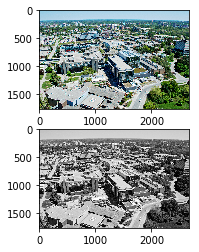

In [0]:
# Solution: write your code in this cell
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('waterloo_aerial_7_.jpg')
plt.subplot(2, 1, 1)
imgplot = plt.imshow(img)

# take mean and then round to nearest integer
img_bw = np.rint(np.mean(img, 2))

plt.subplot(2, 1, 2)
imgplot = plt.imshow(img_bw, cmap='gray')



##### (b) Write code that randomly shuffles all image pixels using function numpy.random.shuffle.

(1766, 2665, 3)


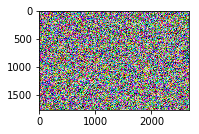

In [0]:
# Solution: write your code in this cell. Show one image and a result of shuffling.
#print(img.shape)
img_cp = np.array(img).flatten()
np.random.shuffle(img_cp)
img_cp
img_cp = np.reshape(img_cp, img.shape)
plt.subplot(2, 1, 1)
plt.imshow(img_cp)

# Problem 5

In [0]:
# roll the image and take difference
# then figure out what happened at the edges
# then divide


##### (a) Image differentiation: Write code for a python function that estimates partial derivatives $d(x,y):=\frac{\partial}{\partial x} f(x,y)$ of any greyscale image $f$ with respect to variable $x$. The function should return a real-valued matrix of the same size as the input image $f$. Use central difference approximation $$\frac{\partial}{\partial x} f(x,y)\approx \frac{f(x+\Delta,y)-f(x-\Delta,y)}{2\Delta}$$ where $\Delta$ is the distance between pixels (use $\Delta=1$). However, instead of writing code using explicit convolution with the corresponding kernel (as in "convolution.ipynb"), compute an image with pixels shifted to the left (using numpy.roll function) and use linear operations over images as matrices (pointwise addition/subtraction). Hint: while shifting pixels to the left or right, you can keep the original intensity values in the right or left most columns.

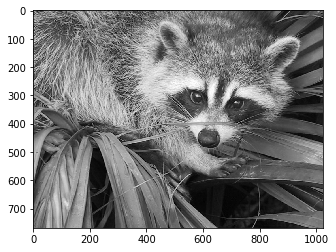

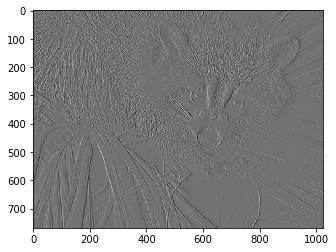

In [0]:
# Solution: write your code in this cell

from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# take image and then average
im = misc.face() 
im = np.mean(im, axis=2)

# display the image
plt.figure(1,figsize = (6, 4))
plt.imshow(im, cmap = 'gray')
plt.show()


# roll the image
im_left_shift = np.roll(im,-1, axis=1)
im_right_shift = np.roll(im, 1, axis=1)

# divide the image by delta
im_result = (im_left_shift - im_right_shift) /2.

# display the final image
plt.imshow(im_result, cmap = 'gray')
plt.show()

##### (b) Point processing: find linear range transformation function $t(d)$ that rescales partial derivatives $d$ computed above to values in the range $[0,255]$ so that $t(d_{max})=255$ for the maximum observed value of partial derivative $d_{max}$ and $t(d_{min})=0$ for the minimum derivative $d_{min}$. Compute the transformed greyscale image $g(x,y) = t(d(x,y))$ and display both $f$ and $d$ (as input image $f$ you can use a grayscale version of any standard image included in python, e.g in scipy.misc).

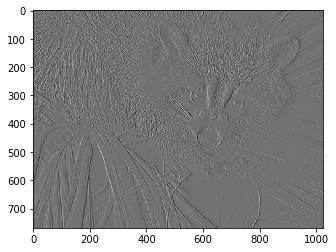

In [0]:
# Solution: write your code in this cell

# add the minimum to get everything to 0, divide by range to get maximum down to 1
# multiply by 255 to get max back to 255
im_final = ((im_result - im_result.min()) / (im_result.max() - im_result.min())) * 255.
im_final.min()


# display the image
plt.imshow(im_result, cmap = 'gray')
plt.show()

##### (c) Write code demonstrating partial derivatives for the same image with substantial amount of added Gaussian noise (you can use code for noise generation from Filtering.ipynb).

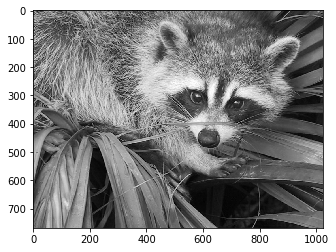

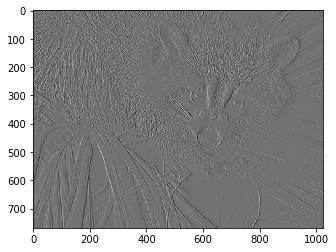

In [0]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im = misc.face() 
im = np.mean(im, axis=2)
plt.figure(1,figsize = (6, 4))
plt.imshow(im, cmap = 'gray')
plt.show()

# important part: put in the noise
noise = np.random.rand(im.shape[0], im.shape[1]) * 50.
im_noise = im + noise

im_final = ((im_noise - im_noise.min()) / (im_noise.max() - im_noise.min())) * 255.

plt.imshow(im_result, cmap = 'gray')
plt.show()

# Problem 6 (linear algebra refresher)

##### (a) In this problem we use $\nabla I (x,y)$ to denote a gradient of image inensities at point $(x,y)$ only to emphasize this dependence of the gradient on location. Assume that $\nabla I (x,y)$  is a non-zero vector at a given point $(x,y)$. What is the rank of matrix $\nabla I(x,y) \cdot \nabla I^T(x,y)$ and why?

Solution:

$M=
  \left[ {\begin{array}{cc}
   f_{x}^2 & f_{x}f_{y} \\
   f_{x}f_{y} & f_{y}^2 \\
  \end{array} } \right]$

We could zero out the second row by multiplying the first row by $\frac{f_{y}}{f_{x}}$ and then subtracting it from the second row. 

$M=
  \left[ {\begin{array}{cc}
   f_{x}^2 & f_{x}f_{y} \\
   0 & 0 \\
  \end{array} } \right]$

We are then left with a single non-zero row showing that the *rank is 1*, since we have just one pivot entry.

##### (b) Assume that an image patch (window $w$) contains a straight intensity edge (as in window $W_b$ below). What should be the rank of Harris matrix  at that patch/window $M_w = \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y)$ and why? 

Solution:

The gradient is zero except for the region where the color is changing at the intensity edge. 

For all these points, the gradient is same. 

Thus, the rank of the matrix remains the same since, the sum of all matrices is then simply a linear combination of the rows and columns of the original matrix. That is, the linear dependencies do not change.

Therefore, we get the *rank = 1*.


##### (c) What is the rank of Harris matrix at a patch/window containing a corner at an intersection of two straight edges  (as in $W_c$ above)? Provide a formal proof.

Solution:  

For there to be a corner, there have to be two linearly independent vectors prependicular to each of the lines, giving the gradient.

Suppose,
$g_{1}=
  \left[ {\begin{array}{cc}
   a \\
   b \\
  \end{array} } \right],\quad g_{2}=
  \left[ {\begin{array}{cc}
   c \\
   d \\
  \end{array} } \right]$
  
Then,
$M_{1}=
  \left[ {\begin{array}{cc}
   a^2 & ab \\
   ab & b^2 \\
  \end{array} } \right], \quad M_{2}=
  \left[ {\begin{array}{cc}
   c^2 & cd \\
   cd & d^2 \\
  \end{array} } \right]$
  
Once we start summing these matrices, multiple times we are just scaling the vectors involved and not affecting the linear dependence.

This leaves us to prove whether the sum of $M_{1}$ and $M_{2}$ consists of linearly independent vectors.

$M_{1} + M_{2}=
  \left[ {\begin{array}{cc}
   a^2 + c^2 & ab + cd \\
   ab + cd & b^2 + d^2 \\
  \end{array} } \right]$
  
Now multiply the upper row by $\frac{ab + cd}{a^2+c^2}$ and subtract result from the lower row.

$
  \left[ {\begin{array}{cc}
   a^2 + c^2 & ab + cd \\
   0 & (b^2 + d^2)-\frac{(ab + cd)^2}{a^2+c^2} \\
  \end{array} } \right]$
  
From here, it is obvious that the matrix has two pivots, since dividing each column with first non-zero entry gives us:
$
  \left[ {\begin{array}{cc}
   1 & \frac{ab + cd}{a^2 + c^2} \\
   0 & 1 \\
  \end{array} } \right]$
  
This shows us that the nullity of the matrix is 0 by Gauss-Jordan elimination.

Therefore, by rank-nullity theorem,
$Rank(M) + Nullity(M) = Dimension(M)$

$Rank(M) = 2 - 0 = 2$
